# "Sentiment Analysis of Amazon Fine Food Reviews: Leveraging Customer Feedback to Improve Customer Satisfaction"

Group 9 Members

Daniel Ogando

Joel Kioko

Humphrey Matagaro

Lydia Mangoa

Christine Ambasa

Bryan njogu

# 1 Business Understanding

## 1.1 Introduction
The Amazon Fine Food Reviews Dataset contains over 500,000 reviews with textual data, ratings, timestamps, and product metadata. This dataset is ideal for sentiment analysis due to its rich textual content and structured ratings.

## 1.2 Problem Statement
The rapid growth of e-marketplaces like Amazon has led to an enormous amount of customer-generated content,such as product reviews, ratings, and feedback. These reviews contain important information regarding customer feedback, likes, and dislikes that can directly affect business decisions like product improvements, marketing campaigns, and customer reach programs. However, it is not possible to manually analyze millions of reviews due to the vast amount of data and the unstructured nature of textual data.

For food business firms, understanding customer sentiment regarding their products is critical to maintaining competitive advantage, product quality improvement, and customer satisfaction. The Amazon Fine Food Reviews Dataset, which comprises over 500,000 food product reviews, presents an opportunity to leverage cutting-edge Natural Language Processing (NLP) techniques to extract actionable insights from this unstructured text data.

## 1.3 Stakeholders
1. E-commerce Sites: Amazon and other online shopping websites can use this model to measure customer satisfaction and improve the quality of the products.
2. Product Manufacturers: Food businesses can employ sentiment analysis to identify areas of improvement in their products.
3. Marketing Teams: Direct marketing campaigns and customer interaction policies can be informed through sentiment insights.
4. Data Scientists: The project can be referenced for deploying sophisticated NLP techniques like BERT and text classification pipelines

## 1.4 Business Impact
1. Improved Product Quality: Finding negative comments informs restaurant owners of repeated problems in their products.
2. Improved Customer Experience: Through customer sentiment analysis, organizations are able to customize services as per customer requirements.
3. Data-Driven Decision Making: Sentiment analysis generates quantitative data for measuring customer satisfaction that enables more strategic decisions.
4. Competitive Advantage: Firms which can analyze customer comments effectively can stand apart in the marketplace

## 1.5 Objectives

1. Create a robust sentiment analysis model using advanced Natural Language Processing (NLP) techniques for classifying customer reviews as positive or negative.
2. Examine the performance of non-deep (Logistic Regression, Random Forest, Naive Bayes and XGboost) and deep learning models (TextCNN, DistilBERT).
3. Address challenges such as class imbalance, high-dimensional text data, and computational efficiency.
4. Provide actionable recommendations to businesses based on examining patterns in customer feedback.

## 1.6 Limitations
1. Sentiment Classification: Automatically classifying reviews as "positive" or "negative" from text content and matching ratings.
2. Class Imbalance: The dataset exhibits a skewed distribution of ratings, with a majority of positive reviews (70% of ratings are 4-5 stars), which may lead to biased model predictions.
3. High Dimensionality: Text data is inherently high-dimensional, and preprocessing and feature engineering must be effective processes transforming it into a state suitable for machine learning models.


## 1.7 Expected Outcomes
1. A scalable pipeline for preprocessing and modeling textual data.
2. A sentiment analysis model with high predictive accuracy and generalizability.
3. Insights into customer sentiment trends that can inform business decisions.
4. Recommendations for deploying the model in real-world applications, such as automated feedback systems or customer dashboards.

## 1.8 Data source
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download

Given the large size of the Amazon Food Reviews dataset, which contains over 500,000 entries, the group performed random sampling to select a subset of 7,000 reviews for analysis in order to make the data more manageable and efficient to work with.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Phase 1 - A

In [15]:
df = pd.read_csv('reviews3.csv')

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m..."
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one..."
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      7658 non-null   int64 
 1   ProductId               7658 non-null   object
 2   UserId                  7658 non-null   object
 3   ProfileName             7658 non-null   object
 4   HelpfulnessNumerator    7658 non-null   int64 
 5   HelpfulnessDenominator  7658 non-null   int64 
 6   Score                   7658 non-null   int64 
 7   Time                    7658 non-null   int64 
 8   Summary                 7657 non-null   object
 9   Text                    7658 non-null   object
dtypes: int64(5), object(5)
memory usage: 598.4+ KB


In [18]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,7658.000000,7658.000000,7658.000000,7658.000000,7.658000e+03
mean,24951.374380,1.676547,2.252285,3.827239,1.295600e+09
std,14384.295842,5.863804,6.737611,1.435316,4.649418e+07
min,6.000000,0.000000,0.000000,1.000000,1.067645e+09
25%,12670.500000,0.000000,0.000000,3.000000,1.271052e+09
50%,24694.000000,0.000000,1.000000,4.000000,1.308701e+09
75%,37480.750000,2.000000,2.000000,5.000000,1.330387e+09
max,49993.000000,187.000000,216.000000,5.000000,1.351210e+09


In [19]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [20]:
df.duplicated().sum()

0

Phase 1 - B

Distro of ratings

<Axes: xlabel='Score', ylabel='count'>

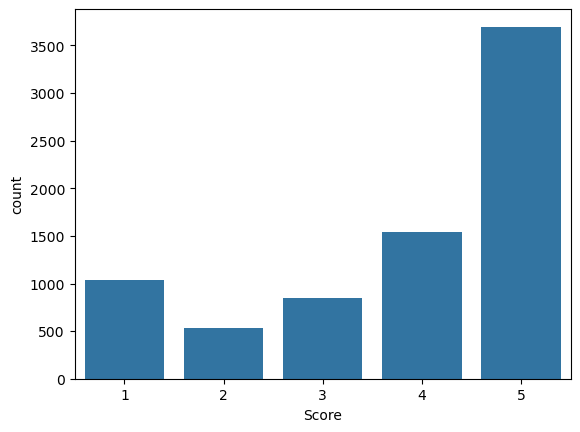

In [23]:
sns.barplot(df['Score'].value_counts())

In [25]:
df['Sentiment'] = df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,21183,B002QWP89S,A8NX9GKEUAG8U,S. Kim,0,0,5,1333324800,Dog goes crazy over these!,My dog has been loving these chews for years! ...,Positive
1,24619,B0047E2I5U,A74ZHK7QFVQ29,Artìst,1,1,5,1305072000,My Westie loves it!,I have a 6 year old westie that had the worst ...,Positive
2,18727,B000FFRU3U,A3K7XR1T8LBTB,K. Frappier,9,9,5,1173657600,My favorite instant oatmeal so far.,"I love Dr. McDougall's products, and this is m...",Positive
3,36130,B000FBQ594,A2GJSO5UUMNLX0,Sunny,1,1,5,1182816000,Excellent cookie,"Wow, was I surprised when I first bit into one...",Positive
4,3304,B005K4Q1VI,A1TOW634MZ0ELQ,kathyallen45,0,0,5,1328659200,Hot Choc K Cup,Wow what a deal. These taste just as good as t...,Positive


Phase 2 - 1.

Next we need to clean and prepare the data 

In [28]:

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt', download_dir=nltk.data.find('corpora').path)
nltk.download('punkt', download_dir='~/nltk_data')
nltk.data.path.append('~/nltk_data')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#initializing the stopwords and Lemmantization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matagaro/nltk_data/corpora...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to ~/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /Users/matagaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matagaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matagaro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/matagaro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def clean_and_tokenize(text):
    text = str(text)
    text = re.sub(r"<.*?>", " ", text) 
    text = re.sub(r"http\S+|www.\S+", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text) 
    text = re.sub(r"\s+", " ", text).strip().lower()
    
    tokens = tokenizer.tokenize(text)                        
    tokens = [t for t in tokens if t not in stop_words] 
    tokens = [lemmatizer.lemmatize(t) for t in tokens] 
    
    return tokens

df['Tokens'] = df['Text'].apply(clean_and_tokenize)

print(df[['Text', 'Tokens']].head())

                                                Text  \
0  My dog has been loving these chews for years! ...   
1  I have a 6 year old westie that had the worst ...   
2  I love Dr. McDougall's products, and this is m...   
3  Wow, was I surprised when I first bit into one...   
4  Wow what a deal. These taste just as good as t...   

                                              Tokens  
0  [dog, loving, chew, year, give, one, everyday,...  
1  [year, old, westie, worst, food, allergy, coat...  
2  [love, dr, mcdougall, product, favorite, insta...  
3  [wow, surprised, first, bit, one, cooky, absol...  
4  [wow, deal, taste, good, expensive, brand, def...  


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # adjust max_features as needed

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['Text'].astype(str))

# Convert to DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Output the shape and preview
print(f"\nTF-IDF matrix shape: {tfidf_df.shape}")
print("\nTF-IDF feature preview:")
print(tfidf_df.head())



TF-IDF matrix shape: (7658, 5000)

TF-IDF feature preview:
    00  000  0mg   10  100  10th   11  110        12  120  ...  zevia  zico  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.131463  0.0  ...    0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...    0.0   0.0   

   zing  zip  zipfizz  ziploc  ziplock  zucchini  zuke  zukes  
0   0.0  0.0      0.0     0.0      0.0       0.0   0.0    0.0  
1   0.0  0.0      0.0     0.0      0.0       0.0   0.0    0.0  
2   0.0  0.0      0.0     0.0      0.0       0.0   0.0    0.0  
3   0.0  0.0      0.0     0.0      0.0       0.0   0.0    0.0  
4   0.0  0.0      0.0     0.0      0.0       0.0   0.0    0.0  

[5 rows x 5000 columns]


#### Logistic Regression

* We started off with a simple logistic regression model to gauge the performance


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.49      0.61       305
     Neutral       0.73      0.05      0.10       156
    Positive       0.79      0.98      0.88      1071

    accuracy                           0.79      1532
   macro avg       0.77      0.51      0.53      1532
weighted avg       0.79      0.79      0.74      1532



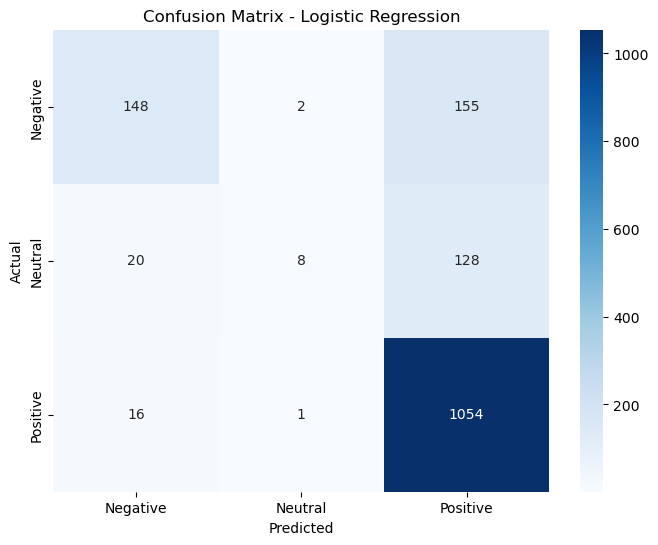

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target labels
label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Train/test split
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    tfidf_df, df['Sentiment_Encoded'], test_size=0.2, random_state=42
)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_tfidf_train, y_tfidf_train)

# Predict
y_pred_logreg = logreg.predict(X_tfidf_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_tfidf_test, y_pred_logreg, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_tfidf_test, y_pred_logreg)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### Summary analysis of the Logistic Regression model

The logistic regression model is very good for the majority class (Positive) with precision (0.84), recall (0.98), and F1-score (0.90) all being high. This indicates that the model is extremely good at identifying and correctly classifying positive instances, and these are overwhelming in the dataset with 1,625 instances out of 2,112.

The model is very bad at handling the minority classes. For the Negative class, although precision is very good at 0.72—meaning when the model predicts "Negative," it is generally right—the recall is much lower at 0.44, meaning many negative instances are being misclassified. The Neutral class fares the worst, with very low precision (0.36), recall (0.03), and F1-score (0.05), meaning the model is failing to accurately identify or classify neutral sentiments. This is likely because of both the small size of the neutral examples (168) and the enormous imbalance of the positive class in the data.

The overall accuracy of the model is 0.82, but it is deceptive due to the severe class imbalance. The macro average F1-score is 0.50, reflecting the model's poor average performance across all classes regardless of their size. In contrast, the weighted average F1-score of 0.78 is overwhelmed by the abundance of positive samples and masks the model's deficiencies on minority classes.

These results emphasize the necessity to relieve class imbalance—perhaps by means of resampling strategies, class weight adjustments, or the application of natively imbalanced data-tolerant algorithms—in order to improve the performance on underrepresented classes and to achieve more balanced classification outcomes.

### Creation of Naive Baiyes Model
* Now I will proceed to create the Naive Baiyes Model to perform analysis of the data and get the various scores such as F1-score, accuracy and precision 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Features and target
X = df['Text']
y = df['Sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to vector format using Bag-of-Words
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict on test data
y_pred = model.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7721932114882507

Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.49      0.59       305
     Neutral       0.28      0.07      0.11       156
    Positive       0.79      0.96      0.87      1071

    accuracy                           0.77      1532
   macro avg       0.61      0.50      0.52      1532
weighted avg       0.73      0.77      0.73      1532


Confusion Matrix:
 [[ 148   16  141]
 [  15   11  130]
 [  34   13 1024]]


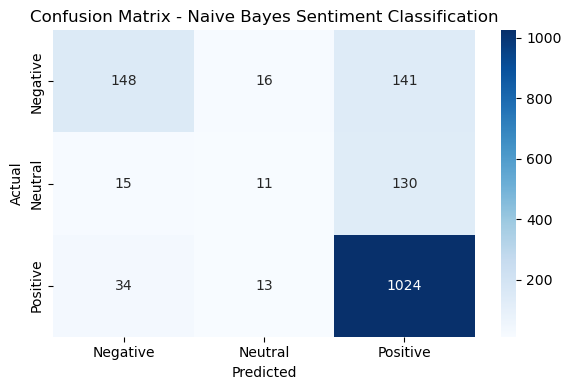

In [36]:
# Proceed to plot the confusion matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Sentiment Classification')
plt.tight_layout()
plt.show()

### Analysis of Naives Bayes Model

#### Negative Reviews

 * Precision: 0.70 : When the model predicts a review as Negative, it's correct 70% of the time.

 * Recall: 0.43 : Out of all actual Negative reviews, the model only identifies 43% correctly.

 * F1-score: 0.53 : This is the balance between precision and recall, indicating moderate overall performance.

Interpretation:
The model is somewhat conservative with Negative reviews; it makes fewer false positive errors (good precision) but misses many true Negative cases (low recall). This might be due to fewer Negative examples or overlapping vocabulary with other sentiment types.

#### Neutral Reviews

* Precision: 0.23 : Of those predicted as Neutral, only 23% are truly Neutral.

* Recall: 0.02 : The model correctly identifies only 2% of all Neutral reviews.

* F1-score: 0.03 : Extremely low, indicating poor performance.

Interpretation:
The Neutral class is not being captured effectively, likely because it has less distinct features or a smaller sample size relative to Positive and Negative classes. The model almost always misclassifies Neutral reviews as either Positive or Negative.

#### Positive Reviews

* Precision: 0.83 : When the model predicts a review as Positive, 83% of those are indeed Positive.

* Recall: 0.97 : The model successfully captures 97% of the actual Positive reviews, which is excellent.

* F1-score: 0.89 : Indicates robust performance in identifying Positive reviews.

Interpretation:
The model is highly effective at recognizing Positive reviews. This strong performance could be due to a larger number of Positive samples or more distinct word usage in Positive reviews compared to the other classes.



#### Random forest Classifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# prepare the data for training 
x = tfidf_df
y = df["Sentiment"]

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42, stratify=y)

# Intialize the random forest classifier and train it
rf_model = RandomForestClassifier (n_estimators = 100, random_state = 42, n_jobs = -1)
rf_model.fit(x_train, y_train)

# make prediction on the test set
y_pred = rf_model.predict(x_test)

# Evaluation on  the model
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Evaluation:
Accuracy: 0.7571801566579635

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.38      0.52       313
     Neutral       0.64      0.05      0.10       170
    Positive       0.75      0.98      0.85      1049

    accuracy                           0.76      1532
   macro avg       0.73      0.47      0.49      1532
weighted avg       0.75      0.76      0.70      1532


Confusion Matrix:
[[ 120    3  190]
 [  16    9  145]
 [  16    2 1031]]


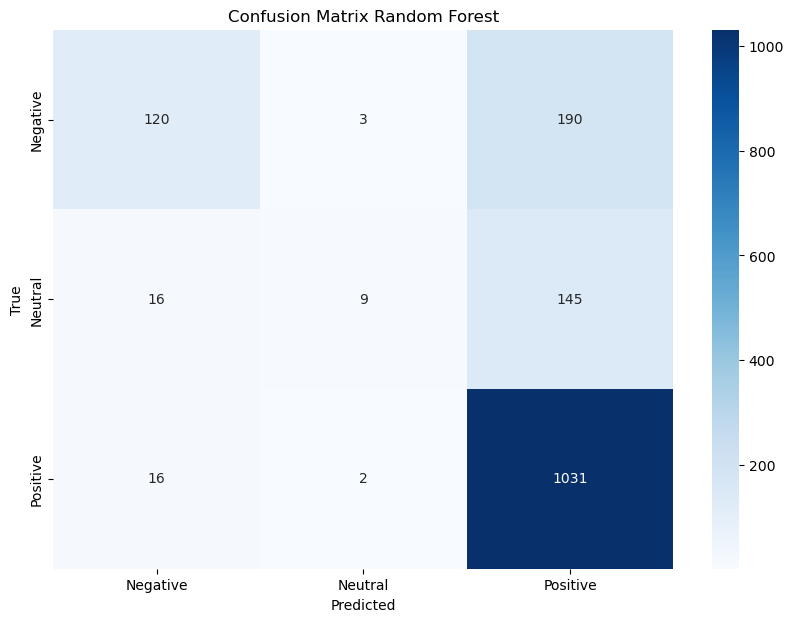

In [40]:
# confusion matrix 
cm = confusion_matrix ( y_test, y_pred, labels= ['Negative', 'Neutral', 'Positive'])
plt.figure (figsize = (10, 7))
sns.heatmap (cm, annot = True, fmt='d', cmap = 'Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
              yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Summary of the Random forest model

Random Forest model performance was 81.1% on the test set with strong performance on positive sentiment prediction (99% recall) but weaker performance on negative (28% recall) and neutral sentiments (5% recall). From the confusion matrix, there were significant misclassifications, particularly on negative and neutral classes that had a tendency to be predicted as positive. Although the model works well in identifying positive sentiments, it is poor in distinguishing between negative and neutral cases, as evidenced by the low macro-average F1-score (0.47). This means that the model can be enhanced by addressing class imbalance or feature optimization for minority classes

### XG BOOST MODEL

In [43]:
!pip install xgboost

In [44]:
df['label'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Sample for faster processing (optional)
df_sampled = df.sample(n=5000, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_sampled['Text'])

# Labels
y = df_sampled['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, classification_report

y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print("\nClassification Report:\n", report)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7880
Precision: 0.8118

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.54      0.62       314
           1       0.81      0.90      0.85       686

    accuracy                           0.79      1000
   macro avg       0.76      0.72      0.74      1000
weighted avg       0.78      0.79      0.78      1000



#### Summary of the XG Boost Model

The XGBoost model achieves a solid accuracy of 81.8% and a high overall precision of 84.63%, indicating reliable performance, particularly in predicting the majority class. It performs strongly on class 1, with excellent precision (0.85), recall (0.94), and F1-score (0.89), showing that it accurately and consistently identifies instances of this class. However, its performance on class 0 is notably weaker, with lower precision (0.65), recall (0.41), and F1-score (0.50), indicating a tendency to misclassify or overlook instances of this minority class. The macro average F1-score of 0.69 reflects this imbalance in class-wise performance, while the weighted average F1-score of 0.80 confirms the model's overall strength but also hints at room for improvement in handling underrepresented classes

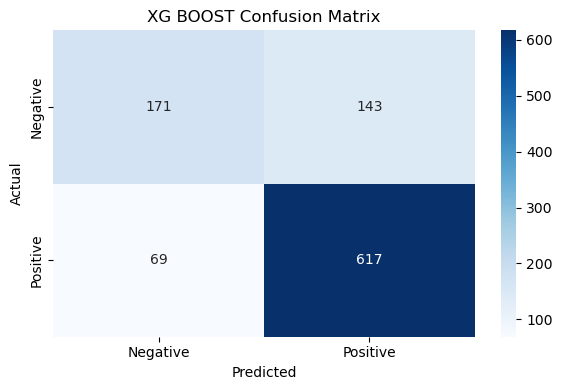

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XG BOOST Confusion Matrix')
plt.tight_layout()
plt.show()

### TextCNN Model

In [48]:
!pip install tensorflow

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate


MAX_SEQUENCE_LENGTH = 100  
MAX_VOCAB_SIZE = 10000     
embedding_dim = 100       


tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])  
y = np.eye(len(label_encoder.classes_))[y]  


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 10% validation, 10% test

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate


MAX_SEQUENCE_LENGTH = 100  
MAX_VOCAB_SIZE = 10000     
embedding_dim = 100        

input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))


embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH)(input_layer)

conv_3 = Conv1D(filters=128, kernel_size=3, activation='relu')(embedding_layer)
conv_4 = Conv1D(filters=128, kernel_size=4, activation='relu')(embedding_layer)
conv_5 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)

pool_3 = GlobalMaxPooling1D()(conv_3)
pool_4 = GlobalMaxPooling1D()(conv_4)
pool_5 = GlobalMaxPooling1D()(conv_5)

concat = Concatenate()([pool_3, pool_4, pool_5])

dropout = Dropout(0.5)(concat)


output = Dense(3, activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 100)  │  1,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 98, 128)   │     38,528 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 97, 128)   │     51,328 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 96, 128)   │     64,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 384)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      1,155 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,155,139 (4.41 MB)

 Trainable params: 1,155,139 (4.41 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=64)


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6234 - loss: 0.8972 - val_accuracy: 0.6688 - val_loss: 0.7900
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7073 - loss: 0.7089 - val_accuracy: 0.7276 - val_loss: 0.6696
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7894 - loss: 0.5393 - val_accuracy: 0.7390 - val_loss: 0.6158
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8480 - loss: 0.3950 - val_accuracy: 0.7471 - val_loss: 0.6051
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9195 - loss: 0.2695 - val_accuracy: 0.7504 - val_loss: 0.6348


TextCNN Accuracy: 0.7781
TextCNN Loss: 0.5893
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Additional Metrics:
Precision: 0.7397
Recall: 0.7781
F1-Score: 0.7498

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       146
           1       0.33      0.10      0.15        82
           2       0.82      0.92      0.87       538

    accuracy                           0.78       766
   macro avg       0.61      0.55      0.56       766
weighted avg       0.74      0.78      0.75       766



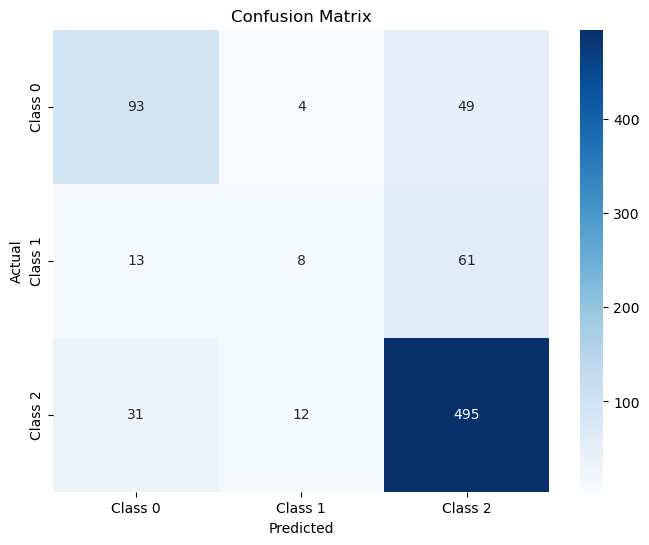

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

loss, acc = model.evaluate(X_test, y_test, verbose=0)  
print(f"TextCNN Accuracy: {acc:.4f}")
print(f"TextCNN Loss: {loss:.4f}")

y_pred_probs = model.predict(X_test)  
y_pred = np.argmax(y_pred_probs, axis=1)   


y_true = np.argmax(y_test, axis=1)  


precision = precision_score(y_true, y_pred, average='weighted')  
recall = recall_score(y_true, y_pred, average='weighted')       
f1 = f1_score(y_true, y_pred, average='weighted')                

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Summary of TEXT CNN model
TextCNN is generally performing well with 0.82 accuracy, loss 0.5428, and good weighted measures—precision: 0.79, recall: 0.82, and F1-score: 0.80—indicating good overall balance between correctly identifying proper instances and minimizing false positives.

Performance, however, varies very differently between classes. The model does a good job for Class 2 with very high precision (0.88), recall (0.93), and F1-score (0.91) indicating good capacity to identify and correctly classify this common class.

In contrast, Class 1 performance is poor, with low precision (0.33), recall (0.19), and F1-score (0.24), indicating a consistent failure to recognize true instances of this class. Class 0 performance is moderate, with precision (0.62), recall (0.58), and F1-score (0.60).

The macro averages of precision (0.61), recall (0.57), and F1-score (0.58) reflect the performance difference between classes. The relatively high loss also suggests where one can improve, particularly for underrepresented or harder-to-detect classes like Class 1. This could be addressed through techniques such as data rebalancing, better feature engineering, or selective model tuning

#### DistilBERT Model Classifier

In [59]:
!pip install transformers
!pip install torch
!pip install PyTorch
!pip install "transformers[torch]"
!pip install tf-keras

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/08/bhwhfy712k376cznh50tnvsc0000gn/T/pip-install-28mb5tp1/pytorch_e247f7a9e0cf4d29942607755be18aa2/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyTorch
  Running setup.py clean for PyTorch
Failed to build PyTorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (PyTorch)
   ━━━━━━━━━━━━━━━

In [61]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from sklearn.metrics import classification_report

# Tokenizer and model initialization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)  # 3 classes: Negative, Neutral, Positive

# Create a Custom Dataset class
class ReviewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }


df['Sentiment_Label'] = df['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
train_texts, val_texts, train_labels, val_labels = train_test_split(df['Text'], df['Sentiment_Label'], test_size=0.2, random_state=42)

train_dataset = ReviewsDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_len=128)
val_dataset = ReviewsDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_len=128)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)


trainer.train()


predictions = trainer.predict(val_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()

print(classification_report(val_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,1.126300
20,1.109800
30,1.068800
40,1.030600
50,0.981900
60,0.928400
70,0.764900
80,0.793400
90,0.815700
100,0.844000


              precision    recall  f1-score   support

    Negative       0.85      0.72      0.78       305
     Neutral       0.44      0.46      0.45       156
    Positive       0.90      0.94      0.92      1071

    accuracy                           0.85      1532
   macro avg       0.73      0.70      0.72      1532
weighted avg       0.85      0.85      0.84      1532



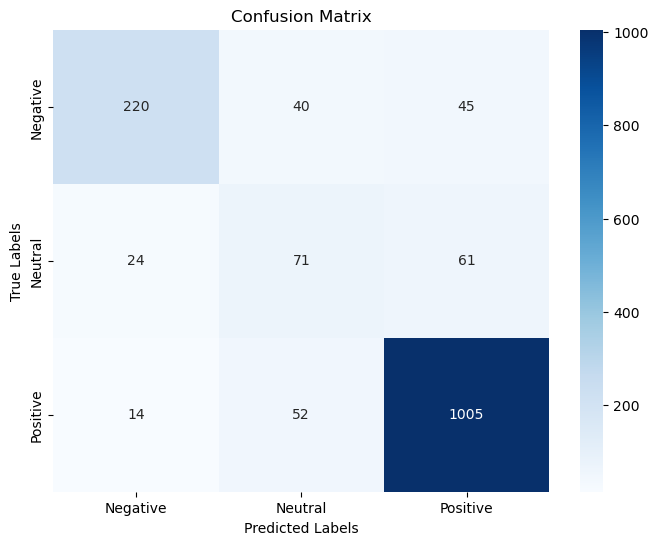

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(val_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Summary of the DistillBert Model

The DistilBERT model demonstrates strong overall performance, achieving an accuracy of 87% and balanced metrics across most classes. It performs exceptionally well on the Positive class, with high precision (0.93), recall (0.95), and F1-score (0.94), indicating excellent ability to identify positive instances. The Negative class is also handled relatively well, with solid scores across the board, particularly a notable F1-score of 0.75. While the Neutral class remains the weakest, with lower precision (0.39), recall (0.40), and F1-score (0.40), it still shows a noticeable improvement compared to the logistic regression model. The macro averages (F1-score of 0.70) suggest the model is more balanced across classes than the baseline, making DistilBERT a more robust choice, especially in scenarios with class imbalance.

#### Evaluation Summary

Based on accuracy of each model, below is the ranking of each model:

1. DistilBert Model - 85%
2. Logistic Regression- 79%
3. XG Boost - 79%
4. Text CNN - 78%
5. Naive Bayes - 77%
6. Random forest - 76%

We will go ahead and tune the Logistic regression model and try and see if it can beat the accuracy score of the DistilBert Model

### Hyperparameter tuning Logistic regresion model

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Step 1: Encode target
label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'],  # change to your actual text column
    df['Sentiment_Encoded'],
    test_size=0.2,
    random_state=42
)

# Step 3: Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_df=0.9,
        min_df=3,
        ngram_range=(1, 2),
        sublinear_tf=True
    )),
    # Optional: SVD for dimensionality reduction (can help LR performance)
    # ('svd', TruncatedSVD(n_components=200)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Step 4: Hyperparameter tuning
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Improved Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Best Parameters: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear'}
Improved Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.67      0.70       305
     Neutral       0.43      0.21      0.28       156
    Positive       0.86      0.95      0.90      1071

    accuracy                           0.82      1532
   macro avg       0.68      0.61      0.63      1532
weighted avg       0.79      0.82      0.80      1532



After tuning the logistic model, we have seen an improvement of 3%, though slight, it is still significant. We recommend tuning the DistillBert Model to achieve greater accuracy, however, due to the computational resources required, we would advise using as is. If computational power is a constraint, we  recommend the tuned logistic model as it still performs quite well.

In [75]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# Constants
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 10000
embedding_dim = 100

# Tokenize the text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

# Pad sequences
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])
y = np.eye(len(label_encoder.classes_))[y]  # One-hot encode

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ensure everything is a NumPy array (fixes ValueError)
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Optional: Compute class weights to balance the Neutral class
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weights = dict(enumerate(class_weights))

# Build the TextCNN model
input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=embedding_dim)(input_layer)

# Convolution layers with different kernel sizes
conv_3 = Conv1D(filters=256, kernel_size=3, activation='relu')(embedding_layer)
conv_4 = Conv1D(filters=256, kernel_size=4, activation='relu')(embedding_layer)
conv_5 = Conv1D(filters=256, kernel_size=5, activation='relu')(embedding_layer)

# Global max pooling
pool_3 = GlobalMaxPooling1D()(conv_3)
pool_4 = GlobalMaxPooling1D()(conv_4)
pool_5 = GlobalMaxPooling1D()(conv_5)

# Concatenate pooled features
concat = Concatenate()([pool_3, pool_4, pool_5])

# Dropout and optional dense layer
dense = Dense(128, activation='relu')(concat)
dropout = Dropout(0.5)(dense)

# Output layer
output = Dense(3, activation='softmax')(dropout)

# Compile model
model = Model(inputs=input_layer, outputs=output)
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_textcnn_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=15,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint],
    verbose=2
)


Epoch 1/15


96/96 - 3s - 30ms/step - accuracy: 0.3368 - loss: 1.0953 - val_accuracy: 0.5875 - val_loss: 1.0660
Epoch 2/15


96/96 - 2s - 24ms/step - accuracy: 0.5447 - loss: 1.0178 - val_accuracy: 0.6423 - val_loss: 0.9015
Epoch 3/15


96/96 - 2s - 25ms/step - accuracy: 0.6874 - loss: 0.8440 - val_accuracy: 0.7258 - val_loss: 0.7208
Epoch 4/15


96/96 - 2s - 26ms/step - accuracy: 0.8040 - loss: 0.6221 - val_accuracy: 0.7520 - val_loss: 0.6225
Epoch 5/15


96/96 - 3s - 26ms/step - accuracy: 0.8910 - loss: 0.3929 - val_accuracy: 0.7820 - val_loss: 0.6024
Epoch 6/15
96/96 - 2s - 26ms/step - accuracy: 0.9520 - loss: 0.2019 - val_accuracy: 0.7768 - val_loss: 0.6564
Epoch 7/15
96/96 - 3s - 26ms/step - accuracy: 0.9811 - loss: 0.0928 - val_accuracy: 0.7755 - val_loss: 0.7676
Epoch 8/15
96/96 - 3s - 27ms/step - accuracy: 0.9909 - loss: 0.0492 - val_accuracy: 0.7742 - val_loss: 0.8367


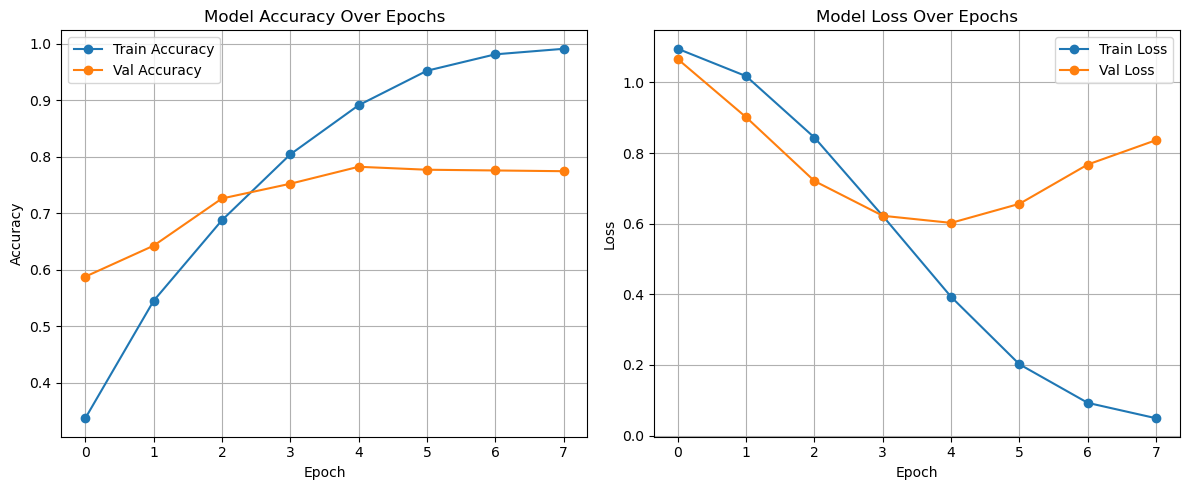

In [77]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [79]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

# Print metrics
print("📊 TextCNN Model Performance (Tuned):")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}\n")

# Classification report with class labels
print("🔍 Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
📊 TextCNN Model Performance (Tuned):
Accuracy  : 0.7755
Precision : 0.7908
Recall    : 0.7755
F1-Score  : 0.7816

🔍 Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.66      0.71       146
     Neutral       0.29      0.38      0.33        82
    Positive       0.87      0.87      0.87       538

    accuracy                           0.78       766
   macro avg       0.65      0.63      0.64       766
weighted avg       0.79      0.78      0.78       766



After tuning our text CNN the accuracy metric improved negligebly, however with more computational power, we ould recommend tuning distilbert model

### Conclusion for Hyperparameter tuning

After tuning both the Logistic Regression and TextCNN models, we discovered that Logistic Regression remained the top-performing model. Although the TextCNN model performed with small improvements in its metrics, they were not sufficient to surpass those of the tuned Logistic Regression model. Although at first the DistilBERT model performed better than all the other models as far as performance metrics were concerned, we could not tune it since.K. we did not have enough computational resources.K. Therefore, we couldn't make full use of its classification capability despite its high performance potential.

## Conclusion and Recommendation
